[Special Thanks](https://qiita.com/nymwa/items/867e05a43060d036a174#97-%E3%83%8F%E3%82%A4%E3%83%91%E3%83%BC%E3%83%91%E3%83%A9%E3%83%A1%E3%83%BC%E3%82%BF%E3%81%AE%E8%AA%BF%E6%95%B4)

## 90. データの準備
機械翻訳のデータセットをダウンロードせよ．訓練データ，開発データ，評価データを整形し，必要に応じてトークン化などの前処理を行うこと．ただし，この段階ではトークンの単位として形態素（日本語）および単語（英語）を採用せよ．


In [15]:
!wget http://www.phontron.com/kftt/download/kftt-data-1.0.tar.gz

--2021-07-29 09:11:52--  http://www.phontron.com/kftt/download/kftt-data-1.0.tar.gz
Resolving www.phontron.com (www.phontron.com)... 208.113.196.149
Connecting to www.phontron.com (www.phontron.com)|208.113.196.149|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 99246893 (95M) [application/gzip]
Saving to: ‘kftt-data-1.0.tar.gz.2’

kftt-data-1.0.tar.g 100%[===================>]  94.65M  33.9MB/s    in 2.8s    

2021-07-29 09:11:55 (33.9 MB/s) - ‘kftt-data-1.0.tar.gz.2’ saved [99246893/99246893]



In [ ]:
#*/*/tok/*にtoken化済みファイルがある
!tar -zxvf kftt-data-1.0.tar.gz

kftt-data-1.0/
kftt-data-1.0/data/
kftt-data-1.0/data/orig/
kftt-data-1.0/data/orig/kyoto-tune.en
kftt-data-1.0/data/orig/kyoto-dev.ja
kftt-data-1.0/data/orig/kyoto-dev.en
kftt-data-1.0/data/orig/kyoto-train.en
kftt-data-1.0/data/orig/kyoto-tune.ja
kftt-data-1.0/data/orig/kyoto-train.ja
kftt-data-1.0/data/orig/kyoto-test.ja
kftt-data-1.0/data/orig/kyoto-test.en
kftt-data-1.0/data/tok/
kftt-data-1.0/data/tok/kyoto-tune.en
kftt-data-1.0/data/tok/kyoto-dev.ja
kftt-data-1.0/data/tok/kyoto-train.cln.en
kftt-data-1.0/data/tok/kyoto-dev.en
kftt-data-1.0/data/tok/kyoto-train.en
kftt-data-1.0/data/tok/kyoto-tune.ja
kftt-data-1.0/data/tok/kyoto-train.cln.ja
kftt-data-1.0/data/tok/kyoto-train.ja
kftt-data-1.0/data/tok/kyoto-test.ja
kftt-data-1.0/data/tok/kyoto-test.en
kftt-data-1.0/README.txt


In [ ]:
!head kftt-data-1.0/data/tok/kyoto-train.ja

雪舟 （ せっしゅう 、 1420 年 （ 応永 27 年 ） - 1506 年 （ 永正 3 年 ） ） は 号 で 、 15 世紀 後半 室町 時代 に 活躍 し た 水墨 画 家 ・ 禅僧 で 、 画聖 と も 称え られ る 。
日本 の 水墨 画 を 一変 さ せ た 。
諱 は 「 等楊 （ とうよう ） 」 、 もしくは 「 拙宗 （ せっしゅう ） 」 と 号 し た 。
備中 国 に 生まれ 、 京都 ・ 相国 寺 に 入 っ て から 周防 国 に 移 る 。
その 後 遣明 使 に 随行 し て 中国 （ 明 ） に 渡 っ て 中国 の 水墨 画 を 学 ん だ 。
作品 は 数 多 く 、 中国 風 の 山水 画 だけ で な く 人物 画 や 花鳥 画 も よ く し た 。
大胆 な 構図 と 力強 い 筆線 は 非常 に 個性 的 な 画風 を 作り出 し て い る 。
現存 する 作品 の うち 6 点 が 国宝 に 指定 さ れ て お り 、 日本 の 画家 の なか で も 別格 の 評価 を 受け て い る と いえ る 。
この ため 、 花鳥 図 屏風 など に 「 伝 雪舟 筆 」 さ れ る 作品 は 大変 多 い 。
真筆 で あ る か 専門 家 の 間 で も 意見 の 分かれ る もの も 多々 あ る 。


In [ ]:
!head kftt-data-1.0/data/tok/kyoto-train.en

Known as Sesshu ( 1420 - 1506 ) , he was an ink painter and Zen monk active in the Muromachi period in the latter half of the 15th century , and was called a master painter .
He revolutionized the Japanese ink painting .
He was given the posthumous name " Toyo " or " Sesshu ( 拙宗 ) . "
Born in Bicchu Province , he moved to Suo Province after entering SShokoku-ji Temple in Kyoto .
Later he accompanied a mission to Ming Dynasty China and learned Chinese ink painting .
His works were many , including not only Chinese-style landscape paintings , but also portraits and pictures of flowers and birds .
His bold compositions and strong brush strokes constituted an extremely distinctive style .
6 of his extant works are designated national treasures . Indeed , he is considered to be extraordinary among Japanese painters .
For this reason , there are a great many artworks that are attributed to him , such as folding screens with pictures of flowers and that birds are painted on them .
There are m

## 91  機械翻訳モデルの訓練
90で準備したデータを用いて，ニューラル機械翻訳のモデルを学習せよ（ニューラルネットワークのモデルはTransformerやLSTMなど適当に選んでよい）．



Fairseqを使う
- facebook製のpytorchで書かれたライブラリ

In [ ]:
!pip install fairseq

     |████████████████████████████████| 1.7 MB 8.4 MB/s 
     |████████████████████████████████| 144 kB 45.2 MB/s 
     |████████████████████████████████| 54 kB 2.7 MB/s 
     |████████████████████████████████| 112 kB 50.2 MB/s 
     |████████████████████████████████| 74 kB 2.7 MB/s 
     |████████████████████████████████| 636 kB 58.4 MB/s 
  Created wheel for antlr4-python3-runtime: filename=antlr4_python3_runtime-4.8-py3-none-any.whl size=141229 sha256=930ba0f107ba60ba9bb084bd30d1f3ce340dfe4dc4d5b7fd171a28f84b31d053
  Stored in directory: /root/.cache/pip/wheels/ca/33/b7/336836125fc9bb4ceaa4376d8abca10ca8bc84ddc824baea6c
Successfully built antlr4-python3-runtime
  Attempting uninstall: PyYAML
    Found existing installation: PyYAML 3.13
    Uninstalling PyYAML-3.13:
      Successfully uninstalled PyYAML-3.13


In [ ]:
#前処理
!fairseq-preprocess -s ja -t en  --trainpref kftt-data-1.0/data/tok/kyoto-train  --validpref kftt-data-1.0/data/tok/kyoto-dev  --destdir ./   --thresholdsrc 5  --thresholdtgt 5  --workers 20

2021-07-29 00:31:09 | INFO | fairseq_cli.preprocess | Namespace(align_suffix=None, alignfile=None, all_gather_list_size=16384, bf16=False, bpe=None, checkpoint_shard_count=1, checkpoint_suffix='', cpu=False, criterion='cross_entropy', dataset_impl='mmap', destdir='./', empty_cache_freq=0, fp16=False, fp16_init_scale=128, fp16_no_flatten_grads=False, fp16_scale_tolerance=0.0, fp16_scale_window=None, joined_dictionary=False, log_format=None, log_interval=100, lr_scheduler='fixed', memory_efficient_bf16=False, memory_efficient_fp16=False, min_loss_scale=0.0001, model_parallel_size=1, no_progress_bar=False, nwordssrc=-1, nwordstgt=-1, only_source=False, optimizer=None, padding_factor=8, profile=False, quantization_config_path=None, scoring='bleu', seed=1, source_lang='ja', srcdict=None, target_lang='en', task='translation', tensorboard_logdir=None, testpref=None, tgtdict=None, threshold_loss_scale=None, thresholdsrc=5, thresholdtgt=5, tokenizer=None, tpu=False, trainpref='kftt-data-1.0/dat

In [ ]:
!fairseq-train ./  --fp16  --save-dir /content/drive/MyDrive/pth/  --max-epoch 20  --arch transformer --share-decoder-input-output-embed  --optimizer adam --clip-norm 1.0  --lr 1e-3 --lr-scheduler inverse_sqrt --warmup-updates 2000  --update-freq 1  --dropout 0.2 --weight-decay 0.0001  --criterion label_smoothed_cross_entropy --label-smoothing 0.1  --max-tokens 8000 > txt.log

epoch 006:  31% 579/1856 [05:24<11:55,  1.78it/s, loss=5.768, nll_loss=4.187, ppl=18.22, wps=11679.2, ups=1.77, wpb=6602.3, bsz=278.6, num_updates=9800, lr=0.000451754, gnorm=0.644, clip=7, loss_scale=4, train_wall=56, wall=0]Traceback (most recent call last):
  File "/usr/local/bin/fairseq-train", line 8, in <module>
    sys.exit(cli_main())
  File "/usr/local/lib/python3.7/dist-packages/fairseq_cli/train.py", line 352, in cli_main
    distributed_utils.call_main(args, main)
  File "/usr/local/lib/python3.7/dist-packages/fairseq/distributed_utils.py", line 301, in call_main
    main(args, **kwargs)
  File "/usr/local/lib/python3.7/dist-packages/fairseq_cli/train.py", line 125, in main
    valid_losses, should_stop = train(args, trainer, task, epoch_itr)
  File "/usr/lib/python3.7/contextlib.py", line 74, in inner
    return func(*args, **kwds)
  File "/usr/local/lib/python3.7/dist-packages/fairseq_cli/train.py", line 208, in train
    log_output = trainer.train_step(samples)
  File "/

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
#google driveに退避
!cp checkpoint10.pt /content/drive/MyDrive/pth/checkpoint10.pt

## 92. 機械翻訳モデルの適用
91で学習したニューラル機械翻訳モデルを用い，与えられた（任意の）日本語の文を英語に翻訳するプログラムを実装せよ．

In [ ]:
!echo "私 は 今日 も カレー を 作り ます 。" > input.ja

In [ ]:
#--beamのDefaultは5
!fairseq-interactive --path /content/drive/MyDrive/pth/checkpoint10.pt ./ < input.ja

2021-07-29 00:39:08 | INFO | fairseq_cli.interactive | Namespace(all_gather_list_size=16384, batch_size=1, batch_size_valid=None, beam=5, bf16=False, bpe=None, broadcast_buffers=False, bucket_cap_mb=25, buffer_size=1, checkpoint_shard_count=1, checkpoint_suffix='', constraints=None, cpu=False, criterion='cross_entropy', curriculum=0, data='./', data_buffer_size=10, dataset_impl=None, ddp_backend='c10d', decoding_format=None, device_id=0, disable_validation=False, distributed_backend='nccl', distributed_init_method=None, distributed_no_spawn=False, distributed_num_procs=1, distributed_port=-1, distributed_rank=0, distributed_world_size=1, distributed_wrapper='DDP', diverse_beam_groups=-1, diverse_beam_strength=0.5, diversity_rate=-1.0, empty_cache_freq=0, eval_bleu=False, eval_bleu_args=None, eval_bleu_detok='space', eval_bleu_detok_args=None, eval_bleu_print_samples=False, eval_bleu_remove_bpe=None, eval_tokenized_bleu=False, fast_stat_sync=False, find_unused_parameters=False, fix_batc

## 93. BLEUスコアの計測
91で学習したニューラル機械翻訳モデルの品質を調べるため，評価データにおけるBLEUスコアを測定せよ．

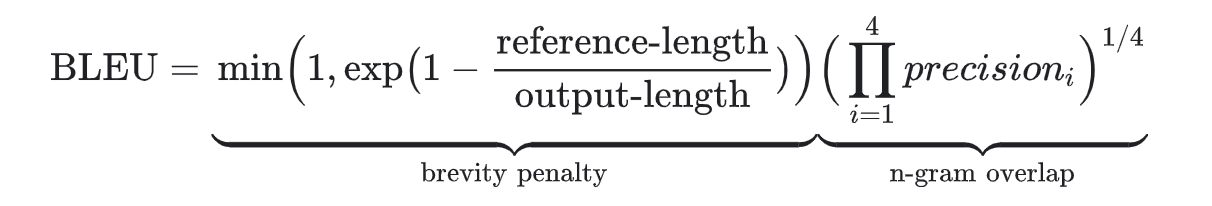
- reference:https://cloud.google.com/translate/automl/docs/evaluate?hl=ja

In [ ]:
!fairseq-interactive --path /content/drive/MyDrive/pth/checkpoint10.pt ./ < ./kftt-data-1.0/data/tok/kyoto-test.ja | grep '^H' | cut -f3 > text.out

/usr/local/lib/python3.7/dist-packages/torch/_tensor.py:575: UserWarning: floor_divide is deprecated, and will be removed in a future version of pytorch. It currently rounds toward 0 (like the 'trunc' function NOT 'floor'). This results in incorrect rounding for negative values.
To keep the current behavior, use torch.div(a, b, rounding_mode='trunc'), or for actual floor division, use torch.div(a, b, rounding_mode='floor'). (Triggered internally at  /pytorch/aten/src/ATen/native/BinaryOps.cpp:467.)
  return torch.floor_divide(self, other)


In [ ]:
#google driveに退避
!cp text.out /content/drive/MyDrive/pth/text.out

In [ ]:
!fairseq-score --sys /content/text.out --ref ./kftt-data-1.0/data/tok/kyoto-test.en

Namespace(ignore_case=False, order=4, ref='./kftt-data-1.0/data/tok/kyoto-test.en', sacrebleu=False, sentence_bleu=False, sys='/content/text.out')
BLEU4 = 2.16, 9.8/3.0/1.2/0.6 (BP=1.000, ratio=3.243, syslen=86695, reflen=26734)


## 94. ビーム探索
91で学習したニューラル機械翻訳モデルで翻訳文をデコードする際に，ビーム探索を導入せよ．ビーム幅を1から100くらいまで適当に変化させながら，開発セット上のBLEUスコアの変化をプロットせよ．

ビームサーチとは https://deepage.net/machine_learning/2017/07/06/beam-search.html

幅優先探索をする際にすべてを考慮すると計算が終わらないので、その場の深さで評価値が良い方から順に上位数個の選択肢のみを考慮するアルゴリズム≒枝刈り

In [ ]:
%%bash
for i in `seq -w 1 10 101` ; do
    fairseq-interactive  --path  /content/drive/MyDrive/pth/checkpoint10.pt    ./ < ./kftt-data-1.0/data/tok/kyoto-test.ja | grep '^H' | cut -f3 > /content/drive/MyDrive/pth/94.$i.out
done

/usr/local/lib/python3.7/dist-packages/torch/_tensor.py:575: UserWarning: floor_divide is deprecated, and will be removed in a future version of pytorch. It currently rounds toward 0 (like the 'trunc' function NOT 'floor'). This results in incorrect rounding for negative values.
To keep the current behavior, use torch.div(a, b, rounding_mode='trunc'), or for actual floor division, use torch.div(a, b, rounding_mode='floor'). (Triggered internally at  /pytorch/aten/src/ATen/native/BinaryOps.cpp:467.)
  return torch.floor_divide(self, other)
/usr/local/lib/python3.7/dist-packages/torch/_tensor.py:575: UserWarning: floor_divide is deprecated, and will be removed in a future version of pytorch. It currently rounds toward 0 (like the 'trunc' function NOT 'floor'). This results in incorrect rounding for negative values.
To keep the current behavior, use torch.div(a, b, rounding_mode='trunc'), or for actual floor division, use torch.div(a, b, rounding_mode='floor'). (Triggered internally at  /

In [ ]:
!cp *.out /content/drive/MyDrive/pth/

In [ ]:
%%bash
for i in `seq -w 1 10 101` ; do
    fairseq-score --sys /content/drive/MyDrive/pth/94.$i.out --ref ./kftt-data-1.0/data/tok/kyoto-test.en > 94.$i.score
done

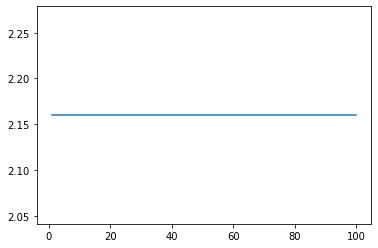

In [ ]:
import matplotlib.pyplot as plt
import re
def read_score(filename):
    with open(filename) as f:
        x = f.readlines()[1]
        x = re.search(r'(?<=BLEU4 = )\d*\.\d*(?=,)', x)
        return float(x.group())

xs = range(1, 101)
ys = [read_score(f'94.{x}.score') for x in xs]
plt.plot(xs, ys)
plt.show()

## 95. サブワード化
トークンの単位を単語や形態素からサブワードに変更し，91-94の実験を再度実施せよ．

In [ ]:
import sentencepiece as spm

spm.SentencePieceTrainer.Train('--input=kftt-data-1.0/data/orig/kyoto-train.ja --model_prefix=kyoto_ja --vocab_size=16000 --character_coverage=1.0')

sp = spm.SentencePieceProcessor()
sp.Load('kyoto_ja.model')

for src, dst in [
    ('kftt-data-1.0/data/orig/kyoto-train.ja', 'train.sub.ja'),
    ('kftt-data-1.0/data/orig/kyoto-dev.ja', 'dev.sub.ja'),
    ('kftt-data-1.0/data/orig/kyoto-test.ja', 'test.sub.ja'),
]:
    with open(src) as f, open(dst, 'w') as g:
        for x in f:
            x = x.strip()
            x = re.sub(r'\s+', ' ', x)
            x = sp.encode_as_pieces(x)
            x = ' '.join(x)
            print(x, file=g)

In [ ]:
%%bash
subword-nmt learn-bpe -s 16000 < kftt-data-1.0/data/orig/kyoto-train.en > kyoto_en.codes
subword-nmt apply-bpe -c kyoto_en.codes < kftt-data-1.0/data/orig/kyoto-train.en > train.sub.en
subword-nmt apply-bpe -c kyoto_en.codes < kftt-data-1.0/data/orig/kyoto-dev.en > dev.sub.en
subword-nmt apply-bpe -c kyoto_en.codes < kftt-data-1.0/data/orig/kyoto-test.en > test.sub.en

In [ ]:
!fairseq-preprocess -s ja -t en  --trainpref train.sub  --validpref dev.sub --destdir data95  --workers 20

In [ ]:
!fairseq-train data95 --save-dir save95 --max-epoch 10 --fp16 --arch transformer --share-decoder-input-output-embed --optimizer adam --clip-norm 1.0 --lr 1e-3 --lr-scheduler inverse_sqrt --warmup-updates 2000 --update-freq 1 --dropout 0.2 --weight-decay 0.0001 --criterion label_smoothed_cross_entropy --label-smoothing 0.1 --max-tokens 8000 > 95.log

In [ ]:
!fairseq-interactive --path save95/checkpoint10.pt data95 < test.sub.ja | grep '^H' | cut -f3 | sed -r 's/(@@ )|(@@ ?$)//g' > 95.out

In [ ]:
def spacy_tokenize(src, dst):
    with open(src) as f, open(dst, 'w') as g:
        for x in f:
            x = x.strip()
            x = ' '.join([doc.text for doc in nlp(x)])
            print(x, file=g)
spacy_tokenize('95.out', '95.out.spacy')

In [ ]:
!fairseq-score --sys 95.out.spacy --ref test.spacy.en

In [ ]:
%%bash
for N in `seq 1 10` ; do
    fairseq-interactive --path save95/checkpoint10.pt --beam $N data95 < test.sub.ja | grep '^H' | cut -f3 | sed -r 's/(@@ )|(@@ ?$)//g' > 95.$N.out
done

In [ ]:
for i in range(1, 11):
    spacy_tokenize(f'95.{i}.out', f'95.{i}.out.spacy')

In [ ]:
%%bash
for N in `seq 1 10` ; do
    fairseq-score --sys 95.$N.out.spacy --ref test.spacy.en > 95.$N.score
done

In [ ]:
xs = range(1, 11)
ys = [read_score(f'95.{x}.score') for x in xs]
plt.plot(xs, ys)
plt.show()

## 96. 学習過程の可視化
Tensorboardなどのツールを用い，ニューラル機械翻訳モデルが学習されていく過程を可視化せよ．可視化する項目としては，学習データにおける損失関数の値とBLEUスコア，開発データにおける損失関数の値とBLEUスコアなどを採用せよ．

In [ ]:
!fairseq-train data95   --fp16   --tensorboard-logdir log96   --save-dir save96   --max-epoch 5   --arch transformer --share-decoder-input-output-embed   --optimizer adam --clip-norm 1.0   --lr 1e-3 --lr-scheduler inverse_sqrt --warmup-updates 2000   --dropout 0.2 --weight-decay 0.0001   --update-freq 1   --criterion label_smoothed_cross_entropy --label-smoothing 0.1   --max-tokens 8000 > 96.log

## 97. ハイパー・パラメータの調整
ニューラルネットワークのモデルや，そのハイパーパラメータを変更しつつ，開発データにおけるBLEUスコアが最大となるモデルとハイパーパラメータを求めよ．

In [ ]:
%%bash
fairseq-train data95 \
    --fp16 \
    --save-dir save97_1 \
    --max-epoch 10 \
    --arch transformer --share-decoder-input-output-embed \
    --optimizer adam --clip-norm 1.0 \
    --lr 1e-3 --lr-scheduler inverse_sqrt --warmup-updates 2000 \
    --dropout 0.1 --weight-decay 0.0001 \
    --update-freq 1 \
    --criterion label_smoothed_cross_entropy --label-smoothing 0.1 \
    --max-tokens 8000 > 97_1.log

fairseq-train data95 \
    --fp16 \
    --save-dir save97_3 \
    --max-epoch 10 \
    --arch transformer --share-decoder-input-output-embed \
    --optimizer adam --clip-norm 1.0 \
    --lr 1e-3 --lr-scheduler inverse_sqrt --warmup-updates 2000 \
    --dropout 0.3 --weight-decay 0.0001 \
    --update-freq 1 \
    --criterion label_smoothed_cross_entropy --label-smoothing 0.1 \
    --max-tokens 8000 > 97_3.log

fairseq-train data95 \
    --fp16 \
    --save-dir save97_5 \
    --max-epoch 10 \
    --arch transformer --share-decoder-input-output-embed \
    --optimizer adam --clip-norm 1.0 \
    --lr 1e-3 --lr-scheduler inverse_sqrt --warmup-updates 2000 \
    --dropout 0.5 --weight-decay 0.0001 \
    --update-freq 1 \
    --criterion label_smoothed_cross_entropy --label-smoothing 0.1 \
    --max-tokens 8000 > 97_5.log

fairseq-interactive --path save97_1/checkpoint10.pt data95 < test.sub.ja | grep '^H' | cut -f3 | sed -r 's/(@@ )|(@@ ?$)//g' > 97_1.out
fairseq-interactive --path save97_3/checkpoint10.pt data95 < test.sub.ja | grep '^H' | cut -f3 | sed -r 's/(@@ )|(@@ ?$)//g' > 97_3.out
fairseq-interactive --path save97_5/checkpoint10.pt data95 < test.sub.ja | grep '^H' | cut -f3 | sed -r 's/(@@ )|(@@ ?$)//g' > 97_5.out

In [ ]:
spacy_tokenize('97_1.out', '97_1.out.spacy')
spacy_tokenize('97_3.out', '97_3.out.spacy')
spacy_tokenize('97_5.out', '97_5.out.spacy')
!fairseq-score --sys 97_1.out.spacy --ref test.spacy.en
!fairseq-score --sys 97_3.out.spacy --ref test.spacy.en
!fairseq-score --sys 97_5.out.spacy --ref test.spacy.en

## 98. ドメイン適応
Japanese-English Subtitle Corpus (JESC)やJParaCrawlなどの翻訳データを活用し，KFTTのテストデータの性能向上を試みよ．



In [ ]:
import tarfile

with tarfile.open('en-ja.tar.gz') as tar:
    for f in tar.getmembers():
        if f.name.endswith('txt'):
            text = tar.extractfile(f).read().decode('utf-8')
            break

data = text.splitlines()
data = [x.split('\t') for x in data]
data = [x for x in data if len(x) == 4]
data = [[x[3], x[2]] for x in data]

with open('jparacrawl.ja', 'w') as f, open('jparacrawl.en', 'w') as g:
    for j, e in data:
        print(j, file=f)
        print(e, file=g)


with open('jparacrawl.ja') as f, open('train.jparacrawl.ja', 'w') as g:
    for x in f:
        x = x.strip()
        x = re.sub(r'\s+', ' ', x)
        x = sp.encode_as_pieces(x)
        x = ' '.join(x)
        print(x, file=g)


!subword-nmt apply-bpe -c kyoto_en.codes < jparacrawl.en > train.jparacrawl.en




In [ ]:
%%bash
fairseq-preprocess -s ja -t en \
    --trainpref train.jparacrawl \
    --validpref dev.sub \
    --destdir data98  \
    --workers 20

fairseq-train data98 \
    --fp16 \
    --save-dir save98_1 \
    --max-epoch 3 \
    --arch transformer --share-decoder-input-output-embed \
    --optimizer adam --clip-norm 1.0 \
    --lr 1e-4 --lr-scheduler inverse_sqrt --warmup-updates 4000 \
    --dropout 0.1 --weight-decay 0.0001 \
    --criterion label_smoothed_cross_entropy --label-smoothing 0.1 \
    --max-tokens 8000 > 98_1.log

fairseq-interactive --path save98_1/checkpoint3.pt data98 < test.sub.ja | grep '^H' | cut -f3 | sed -r 's/(@@ )|(@@ ?$)//g' > 98_1.out

In [ ]:
spacy_tokenize('98_1.out', '98_1.out.spacy')
!fairseq-score --sys 98_1.out.spacy --ref test.spacy.en

## 99. 翻訳サーバの構築
ユーザが翻訳したい文を入力すると，その翻訳結果がウェブブラウザ上で表示されるデモシステムを構築せよ．